In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
df.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
cat_col=[]
num_col=[]
for i in df.columns:
    if df[i].dtype=='object':
        cat_col.append(i)
    else:
        num_col.append(i)

In [9]:
df[cat_col]

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [10]:
df.drop('ID',axis=1,inplace=True)

In [11]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


Data Visualization

In [12]:
df['Product_importance'].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

<Axes: xlabel='Customer_rating', ylabel='count'>

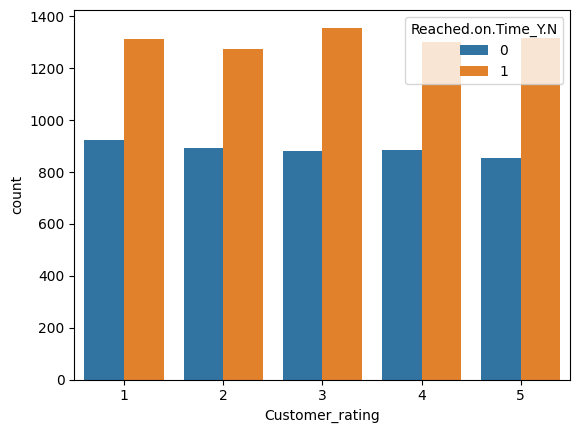

In [13]:
df.columns
sns.countplot(x='Customer_rating',hue='Reached.on.Time_Y.N',data=df)

Customer rating is not affecting on product deliveries

<Axes: xlabel='Customer_care_calls', ylabel='count'>

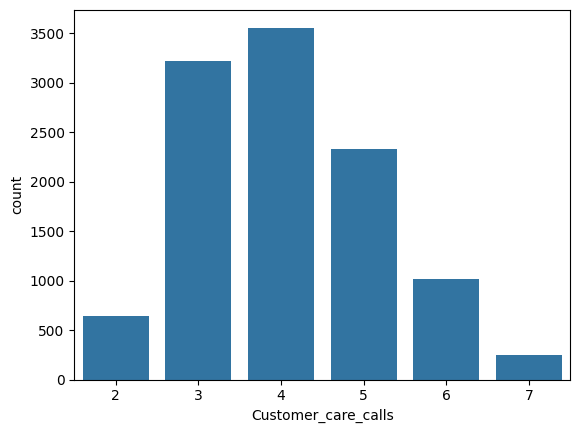

In [14]:
sns.countplot(x='Customer_care_calls',data=df)

The majority of customer care calls fall within the range of 3 to 5 calls.
The count of calls decreases as the number of customer care calls increases. This indicates that most customers make fewer than 4 calls.

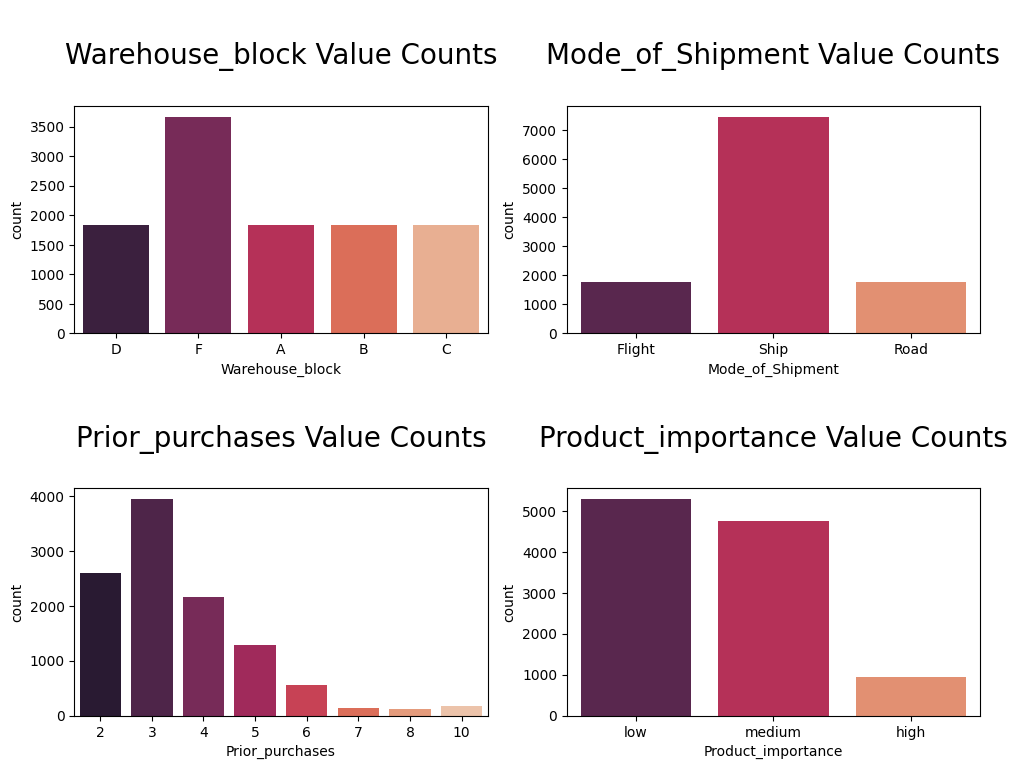

In [15]:
cols = ['Warehouse_block', 'Mode_of_Shipment', 'Prior_purchases', 'Product_importance']

plt.figure(figsize = (10, 15))
plotnumber = 1


for i in range(len(cols)):
    if plotnumber <= 8:
        ax = plt.subplot(4, 2, plotnumber)
        sns.countplot(x = cols[i], data = df, ax = ax, palette='rocket')
        plt.title(f"\n{cols[i]} Value Counts\n", fontsize = 20)
        
    plotnumber += 1

plt.tight_layout()
plt.show()


Warehouse Block: The most frequently used warehouse block is ‘F’.
Mode of Shipment: The most common mode of shipment is ‘Ship’, significantly more than ‘Flight’ and ‘Road’.
Prior Purchases: Most customers have made 2 to 5 prior purchases. Very few customers have made 8 to 10 prior purchases.
Product Importance: Most products are of ‘low’ importance. 

These insights can help the e-commerce company understand their operations better and identify areas for improvement. 

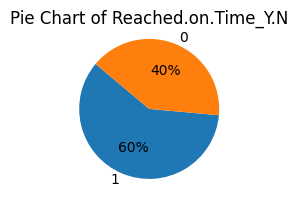

In [16]:

counts = df['Reached.on.Time_Y.N'].value_counts()

# Create a pie chart
plt.figure(figsize=(3, 2))
plt.pie(counts, labels=counts.index, autopct='%1.0f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Pie Chart of Reached.on.Time_Y.N')
plt.show()


 It shows the distribution of items or cases that reached on time versus those that did not. It indicates that 60% of the items (or cases) reached on time (represented by ‘1’), and 40% did not reach on time (represented by ‘0’). This could provide valuable insights into the efficiency of the delivery process.

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

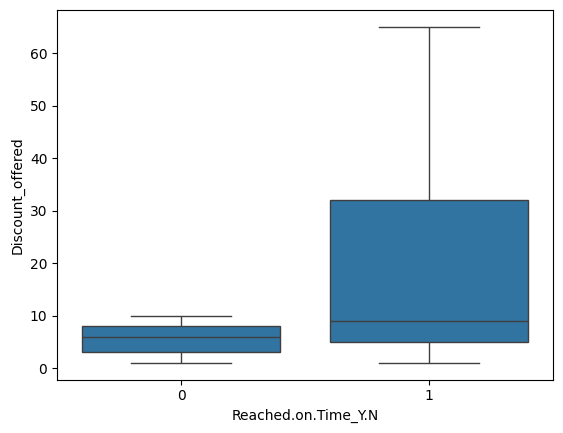

In [17]:
sns.boxplot(x=df['Reached.on.Time_Y.N'], y=df['Discount_offered'])

From the graph, we can observe that:

Products that did not reach on time (0) were generally offered a lower discount.

Products that did reach on time (1) were generally offered a higher discount.

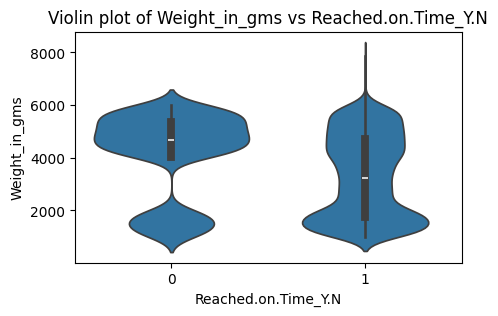

In [18]:
plt.figure(figsize=(5,3))
sns.violinplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=df)

plt.title('Violin plot of Weight_in_gms vs Reached.on.Time_Y.N')
plt.show()

The left plot (0) corresponds to packages that did not reach on time. 
It has a wider distribution, indicating more variation in package weights in this category.

The right plot (1) corresponds to packages that reached on time. It is slimmer, showing less variation in weights for these packages.
Y-Axis: This represents the weight of the packages in grams, ranging from 1000 to 8000 grams.

X-Axis: This represents whether the packages reached on time or not, with 0 indicating they did not reach on time and 1 indicating they did.

Internal Lines within Plots: These lines represent the median and interquartile range within each category’s weight distribution. They give a sense of where the middle of the data lies and how spread out the data is.

 From this plot, it appears that packages that did not reach on time (0) have a wider range of weights compared to those that did (1). This could suggest that heavier packages are more likely to be delayed, but further analysis would be needed to confirm this. The median weight (indicated by the white dot) seems to be similar for both categories

In [19]:
df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [20]:
df.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [21]:
x = df.drop(columns='Reached.on.Time_Y.N')
y =df['Reached.on.Time_Y.N']


In [22]:
x

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,F,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484
...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538
10995,B,Ship,4,1,232,5,medium,F,6,1247
10996,C,Ship,5,4,242,5,low,F,4,1155
10997,F,Ship,5,2,223,6,medium,M,2,1210


In [23]:
x.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,D,Flight,4,2,177,3,low,F,44,1233
1,F,Flight,4,5,216,2,low,M,59,3088
2,A,Flight,2,2,183,4,low,M,48,3374
3,B,Flight,3,3,176,4,medium,M,10,1177
4,C,Flight,2,2,184,3,medium,F,46,2484


In [24]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Reached.on.Time_Y.N, dtype: int64

In [25]:
num_col.remove('ID')
num_col.remove('Reached.on.Time_Y.N')

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train,X_test,y_train,y_test = train_test_split(x, y,test_size=0.2,random_state=42)

In [28]:
print(X_train.shape)
print(y_train.shape)

(8799, 10)
(8799,)


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_test[num_col] = scaler.transform(X_test[num_col])

In [30]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Define categorical columns
cat_col = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender']

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False,drop='first',handle_unknown='ignore')

ohe.fit(X_train[cat_col])

OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

In [31]:
encoded_col = list(ohe.get_feature_names_out())

In [32]:

X_train[encoded_col] = ohe.transform(X_train[cat_col])
X_test[encoded_col] = ohe.transform(X_test[cat_col])

In [33]:
X_train.drop(columns=cat_col,axis=1,inplace=True)
X_test.drop(columns=cat_col,axis=1,inplace=True)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Create an instance of Logistic Regression
log_reg = LogisticRegression()

# Train the model on the training data
log_reg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.644090909090909

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.64      2200
   macro avg       0.63      0.63      0.63      2200
weighted avg       0.64      0.64      0.64      2200



In [37]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6631818181818182


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.68      0.62       895
           1       0.75      0.65      0.70      1305

    accuracy                           0.66      2200
   macro avg       0.66      0.67      0.66      2200
weighted avg       0.68      0.66      0.67      2200



In [40]:
from sklearn.model_selection import  GridSearchCV

In [ ]:


from sklearn.model_selection import  GridSearchCV


# Define the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Print the best parameters and the best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best Score: 0.6740549899219598
Test Accuracy: 0.6863636363636364


In [41]:
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)


best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.6740542146880977
Test Accuracy: 0.6877272727272727


In [ ]:
from sklearn.svm import SVC

# Create an SVC classifier
svc_classifier = SVC()

# Train the classifier
svc_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = svc_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6627272727272727


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.84      0.67       895
           1       0.83      0.54      0.66      1305

    accuracy                           0.66      2200
   macro avg       0.69      0.69      0.66      2200
weighted avg       0.72      0.66      0.66      2200



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Fit the model with the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, test_predictions)
print("Testing Accuracy:", test_accuracy)

# Print classification report for the test set
print("Classification Report for Test Set:\n", classification_report(y_test, test_predictions))


Best Hyperparameters: {'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Testing Accuracy: 0.645
Classification Report for Test Set:
               precision    recall  f1-score   support

           0       0.56      0.63      0.59       895
           1       0.72      0.66      0.69      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200

